# BIKE RENTING COUNT

In [2]:
#Load libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns
from random import randrange, uniform

In [3]:
#changing the directory
os.chdir("D:\gaggi")
os.getcwd()

'D:\\gaggi'

In [4]:
#uploading the data set.
original=pd.read_csv("day.csv")
original.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


# EDA

In [5]:
#crating a copy of orignal data for further use 
bike_data=pd.DataFrame(original)

In [6]:
type(bike_data)

pandas.core.frame.DataFrame

In [7]:
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [8]:
bike_data.shape

(731, 16)

In [9]:
bike_data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [10]:
bike_data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [11]:
bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [12]:
#as we can see instant variable is just numbering nd has no use in further data analysis
bike_data=bike_data.drop(["instant"],axis=1)
#also renaming the colums for better visability.
bike_data.rename(columns={"dteday":"date-day","yr":"year","mnth":"month","workingday":"working day","weathersit":"weather situation","temp":"temperature","atemp":"temperature felt","hum":"humidity","casual":"casual user","registered":"registered user","cnt":"count of bike users"},inplace=True)
bike_data.head()

,date-day,season,year,month,holiday,weekday,working day,weather situation,temperature,temperature felt,humidity,windspeed,casual user,registered user,count of bike users
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [13]:
#target variable
bike_data["count of bike users"].describe()

count     731.000000
mean     4504.348837
std      1937.211452
min        22.000000
25%      3152.000000
50%      4548.000000
75%      5956.000000
max      8714.000000
Name: count of bike users, dtype: float64

C:\Users\hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


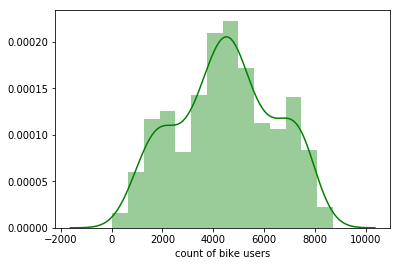

In [14]:
#Checking whether target variable is normal or not
sns.distplot(bike_data["count of bike users"],color="g")

In [15]:
#Here Skewness is very less so target variable  is normal distribution
print("Skewness: %f" % bike_data['count of bike users'].skew())
print("Kurtosis: %f" % bike_data['count of bike users'].kurt())

Skewness: -0.047353
Kurtosis: -0.811922


##univariant analysis

In [16]:
#starting with numerical variables
#temperature
bike_data["temperature"].describe()

count    731.000000
mean       0.495385
std        0.183051
min        0.059130
25%        0.337083
50%        0.498333
75%        0.655417
max        0.861667
Name: temperature, dtype: float64

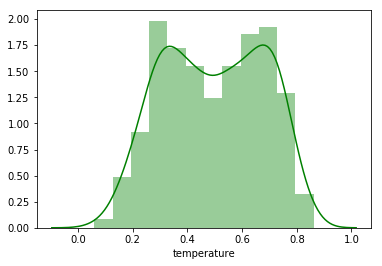

In [17]:
sns.distplot(bike_data["temperature"],color="g")

In [18]:
#temperature felt
bike_data["temperature felt"].describe()

count    731.000000
mean       0.474354
std        0.162961
min        0.079070
25%        0.337842
50%        0.486733
75%        0.608602
max        0.840896
Name: temperature felt, dtype: float64

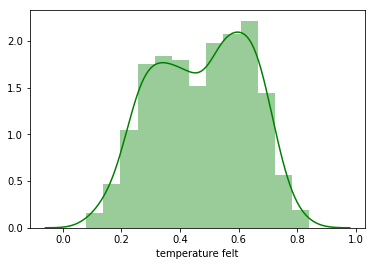

In [19]:
sns.distplot(bike_data["temperature felt"],color="g")

In [20]:
#humidity
bike_data["humidity"].describe()

count    731.000000
mean       0.627894
std        0.142429
min        0.000000
25%        0.520000
50%        0.626667
75%        0.730209
max        0.972500
Name: humidity, dtype: float64

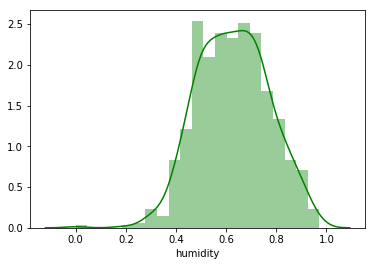

In [21]:
sns.distplot(bike_data["humidity"],color="g")

In [22]:
#windspeed
bike_data["windspeed"].describe()

count    731.000000
mean       0.190486
std        0.077498
min        0.022392
25%        0.134950
50%        0.180975
75%        0.233214
max        0.507463
Name: windspeed, dtype: float64

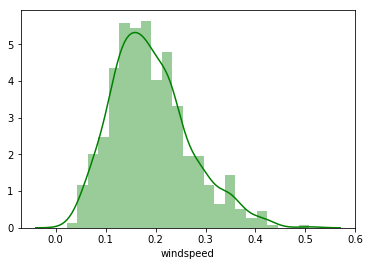

In [23]:
sns.distplot(bike_data["windspeed"],color="g")

In [24]:
#casual user
bike_data["casual user"].describe()

count     731.000000
mean      848.176471
std       686.622488
min         2.000000
25%       315.500000
50%       713.000000
75%      1096.000000
max      3410.000000
Name: casual user, dtype: float64

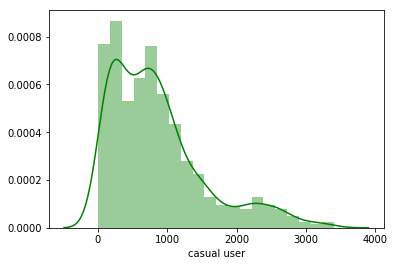

In [25]:
sns.distplot(bike_data["casual user"],color="g")

In [26]:
#registered users
bike_data["registered user"].describe()

count     731.000000
mean     3656.172367
std      1560.256377
min        20.000000
25%      2497.000000
50%      3662.000000
75%      4776.500000
max      6946.000000
Name: registered user, dtype: float64

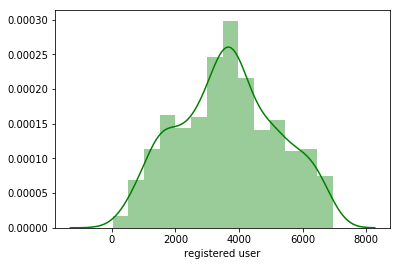

In [27]:
sns.distplot(bike_data["registered user"],color="g")

In [28]:
bike_data.head()

,date-day,season,year,month,holiday,weekday,working day,weather situation,temperature,temperature felt,humidity,windspeed,casual user,registered user,count of bike users
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


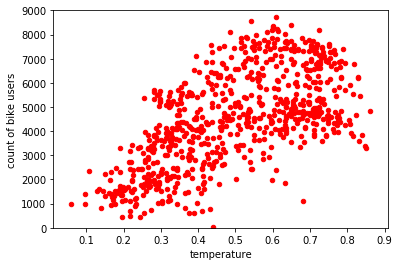

In [29]:
#Bivariate  Relationship
#relation between Numerical Variable 'temperature' and target variable 'count of bike users'
#Now draw scatter plot between 'temperature' and 'count of bike users' variables

data = pd.concat([bike_data['temperature'], bike_data["count of bike users"]], axis=1)
data.plot.scatter(x='temperature', y='count of bike users', ylim=(0,9000),c='r');

# It is showing  there is good relation between 'temperature' and 'count of bike users'

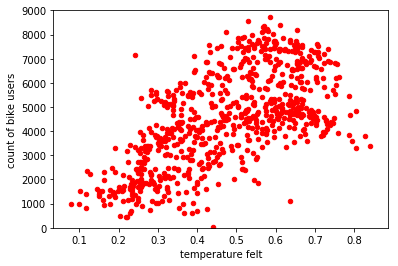

In [30]:
#Now draw scatter plot between 'temperature felt' and 'count of bike users' variables

data = pd.concat([bike_data['temperature felt'], bike_data["count of bike users"]], axis=1)
data.plot.scatter(x='temperature felt', y='count of bike users', ylim=(0,9000),c='r');

# It is showing  there is good relation between 'temperature felt' and 'count of bike users'

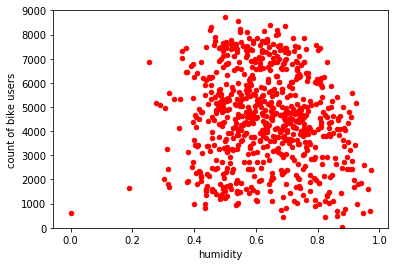

In [31]:
#Now draw scatter plot between 'Humidity' and 'count of bike users' variables

data = pd.concat([bike_data['humidity'], bike_data["count of bike users"]], axis=1)
data.plot.scatter(x='humidity', y='count of bike users', ylim=(0,9000),c='r');

# It is showing  there is an average relation between 'humidity' and 'count of bike users'

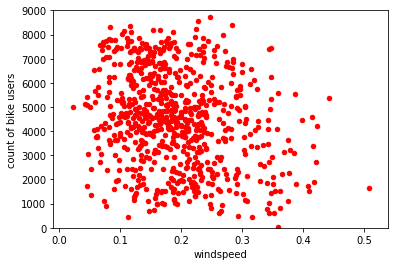

In [32]:
#Now draw scatter plot between 'windspeed' and 'count of bike users' variables

data = pd.concat([bike_data['windspeed'], bike_data["count of bike users"]], axis=1)
data.plot.scatter(x='windspeed', y='count of bike users', ylim=(0,9000),c='r');

# It is showing  there is an negitive relation between 'windspeed' and 'count of bike users'

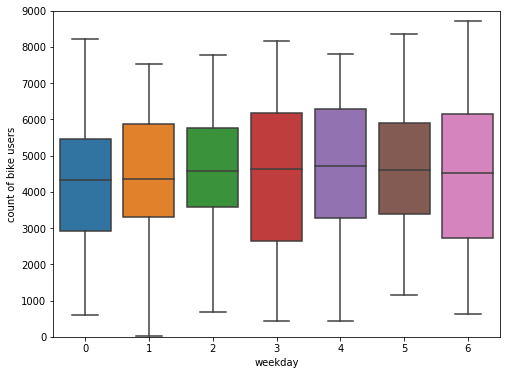

In [33]:

#box plot 'Weekdays' with 'CNT'
var_weekdays = 'weekday'
data = pd.concat([bike_data['count of bike users'], bike_data[var_weekdays]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var_weekdays, y="count of bike users", data=data)
fig.axis(ymin=0, ymax=9000);

#below Boxplot is saying that for all the weekdays median in between 4000- 5000  

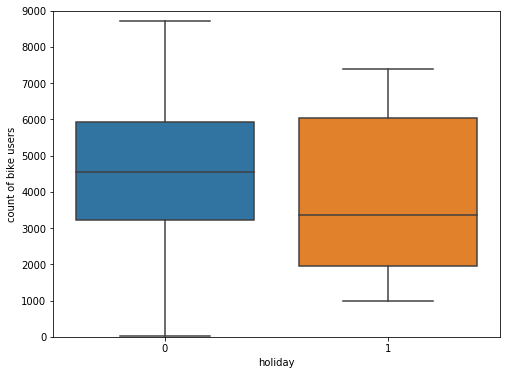

In [34]:

#box plot 'weekends' with 'CNT'
var_holiday = 'holiday'
data = pd.concat([bike_data['count of bike users'], bike_data[var_holiday]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var_holiday, y="count of bike users", data=data)
fig.axis(ymin=0, ymax=9000);

#below Boxplot is saying that median  high on  holidays when compare to weekdays

In [35]:
bike_data.head()

,date-day,season,year,month,holiday,weekday,working day,weather situation,temperature,temperature felt,humidity,windspeed,casual user,registered user,count of bike users
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


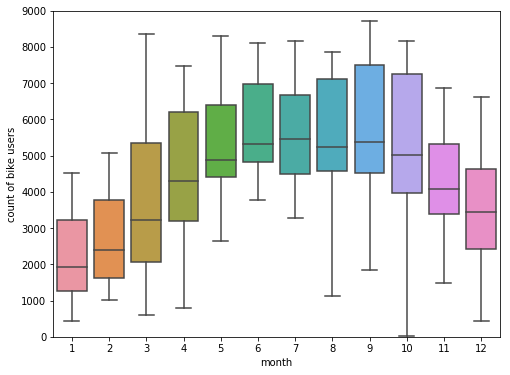

In [36]:
var_month="month"
data=pd.concat([bike_data["count of bike users"],bike_data[var_month]],axis=1)
f,ax=plt.subplots(figsize=(8,6))
fig=sns.boxplot(x=var_month,y="count of bike users",data=data)
fig.axis(ymin=0,ymax=9000);

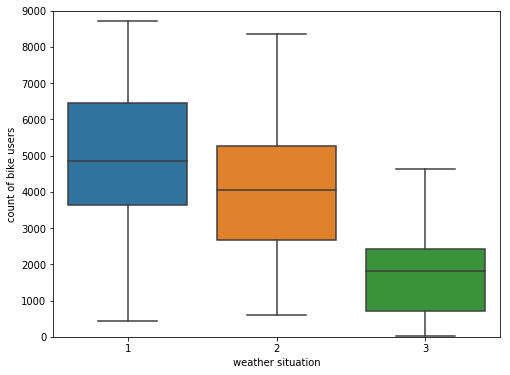

In [37]:
var_month="weather situation"
data=pd.concat([bike_data["count of bike users"],bike_data[var_month]],axis=1)
f,ax=plt.subplots(figsize=(8,6))
fig=sns.boxplot(x=var_month,y="count of bike users",data=data)
fig.axis(ymin=0,ymax=9000);

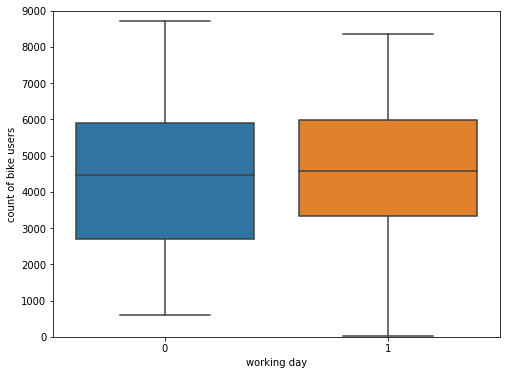

In [38]:
var_month="working day"
data=pd.concat([bike_data["count of bike users"],bike_data[var_month]],axis=1)
f,ax=plt.subplots(figsize=(8,6))
fig=sns.boxplot(x=var_month,y="count of bike users",data=data)
fig.axis(ymin=0,ymax=9000);

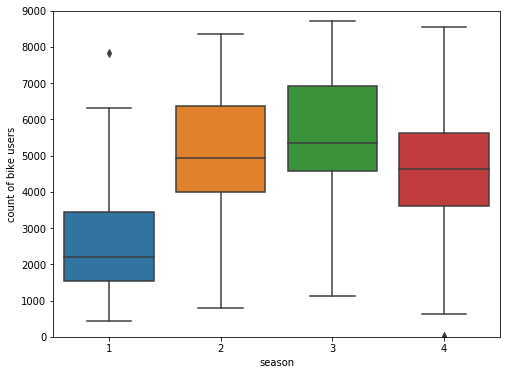

In [39]:
var_month="season"
data=pd.concat([bike_data["count of bike users"],bike_data[var_month]],axis=1)
f,ax=plt.subplots(figsize=(8,6))
fig=sns.boxplot(x=var_month,y="count of bike users",data=data)
fig.axis(ymin=0,ymax=9000);

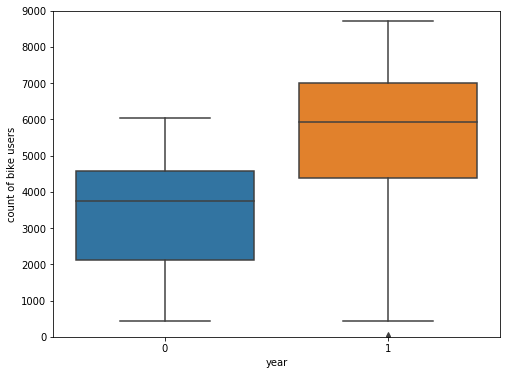

In [40]:
var_month="year"
data=pd.concat([bike_data["count of bike users"],bike_data[var_month]],axis=1)
f,ax=plt.subplots(figsize=(8,6))
fig=sns.boxplot(x=var_month,y="count of bike users",data=data)
fig.axis(ymin=0,ymax=9000);

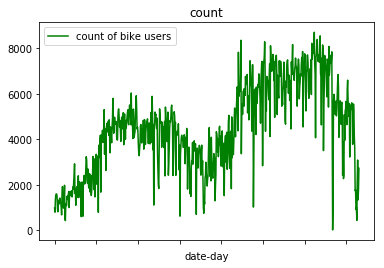

In [41]:
bike_data.plot(x='date-day',y='count of bike users',c='g',title="count")

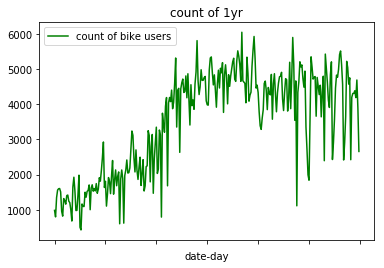

In [42]:
bike_data[:30*10].plot(x='date-day',y='count of bike users',c='g',title="count of 1yr")

season
1     471348
2     918589
3    1061129
4     841613
Name: count of bike users, dtype: int64

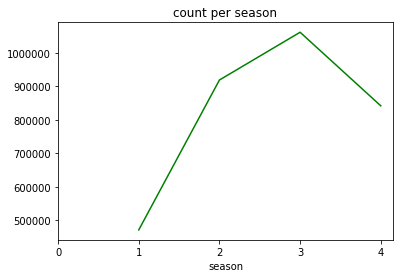

In [43]:
season=bike_data.groupby('season')['count of bike users'].sum()
season.plot(x='season',y='count of bike users',c='g',title='count per season',xticks=(0,1,2,3,4))
season.head()

year
0    1243103
1    2049576
Name: count of bike users, dtype: int64

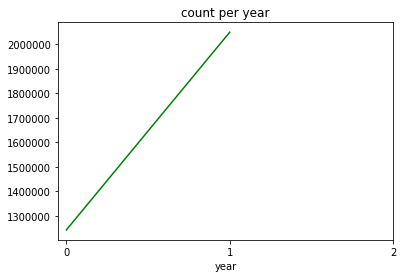

In [44]:
year=bike_data.groupby('year')['count of bike users'].sum()
year.plot(x='year',y='count of bike users',c='g',title='count per year',xticks=(0,1,2))
year.head()

month
1    134933
2    151352
3    228920
4    269094
5    331686
Name: count of bike users, dtype: int64

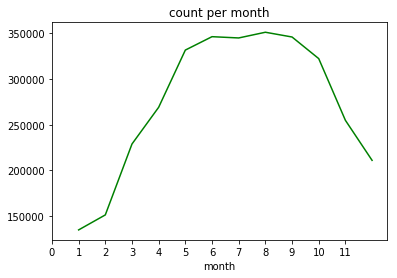

In [45]:
month=bike_data.groupby('month')['count of bike users'].sum()
month.plot(x='month',y='count of bike users',c='g',title='count per month',xticks=(range(0,12)))
month.head()

holiday
0    3214244
1      78435
Name: count of bike users, dtype: int64

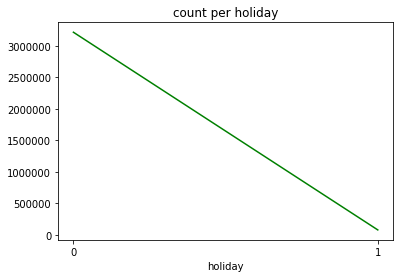

In [46]:
holiday=bike_data.groupby('holiday')['count of bike users'].sum()
holiday.plot(x='holiday',y='count of bike users',c='g',title='count per holiday',xticks=(range(0,2)))
holiday.head()

weekday
0    444027
1    455503
2    469109
3    473048
4    485395
Name: count of bike users, dtype: int64

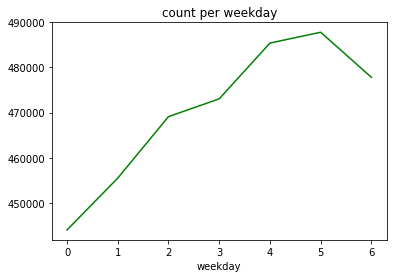

In [47]:
week=bike_data.groupby('weekday')['count of bike users'].sum()
week.plot(x='weekday',y='count of bike users',c='g',title='count per weekday',xticks=(range(0,7)))
week.head()

working day
0    1000269
1    2292410
Name: count of bike users, dtype: int64

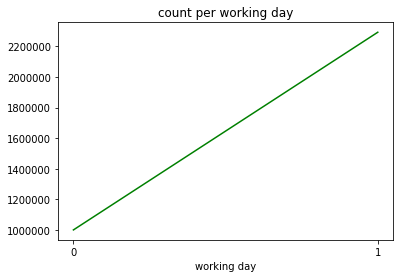

In [48]:
work=bike_data.groupby('working day')['count of bike users'].sum()
work.plot(x='working day',y='count of bike users',c='g',title='count per working day',xticks=(range(0,2)))
work.head()

weather situation
1    2257952
2     996858
3      37869
Name: count of bike users, dtype: int64

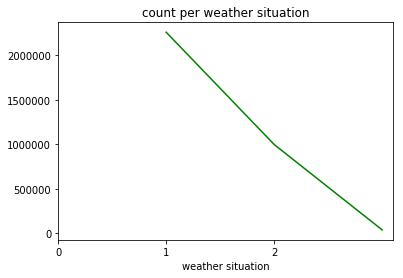

In [49]:
weathersit=bike_data.groupby('weather situation')['count of bike users'].sum()
weathersit.plot(x='weather situation',y='count of bike users',c='g',title='count per weather situation',xticks=(range(0,3)))
weathersit.head()

# missing value analysis

In [50]:
bike_data.isnull().sum()
#there are no missing values hence we move forward

date-day               0
season                 0
year                   0
month                  0
holiday                0
weekday                0
working day            0
weather situation      0
temperature            0
temperature felt       0
humidity               0
windspeed              0
casual user            0
registered user        0
count of bike users    0
dtype: int64

# Outlier analysis

{'whiskers': [<matplotlib.lines.Line2D at 0x1942ca1a4e0>,
 'caps': [<matplotlib.lines.Line2D at 0x1942c9c4f28>,
 'boxes': [<matplotlib.lines.Line2D at 0x1942ca1a3c8>],
 'medians': [<matplotlib.lines.Line2D at 0x1942c9c4978>],
 'fliers': [<matplotlib.lines.Line2D at 0x1942c9c4a20>],
 'means': []}

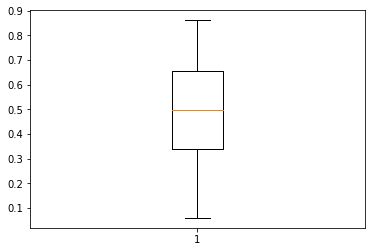

In [51]:
#lets check outlyers one by one for all numerical variables
#temperature
plt.boxplot(bike_data['temperature'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1942cc35b38>,
 'caps': [<matplotlib.lines.Line2D at 0x1942cc2d828>,
 'boxes': [<matplotlib.lines.Line2D at 0x1942cc35710>],
 'medians': [<matplotlib.lines.Line2D at 0x1942cc2df60>],
 'fliers': [<matplotlib.lines.Line2D at 0x1942cae0320>],
 'means': []}

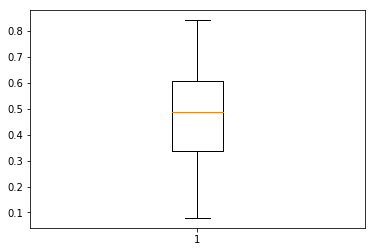

In [52]:
#Temperature felt
plt.boxplot(bike_data["temperature felt"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1942cbed7f0>,
 'caps': [<matplotlib.lines.Line2D at 0x1942cbed6a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1942cbed828>],
 'medians': [<matplotlib.lines.Line2D at 0x1942c8729e8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1942cb0c630>],
 'means': []}

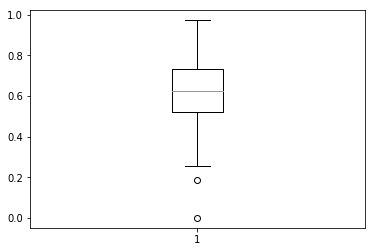

In [53]:
#humidity
plt.boxplot(bike_data["humidity"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1942cb2e160>,
 'caps': [<matplotlib.lines.Line2D at 0x1942cace550>,
 'boxes': [<matplotlib.lines.Line2D at 0x1942cb2e208>],
 'medians': [<matplotlib.lines.Line2D at 0x1942cace048>],
 'fliers': [<matplotlib.lines.Line2D at 0x1942caceef0>],
 'means': []}

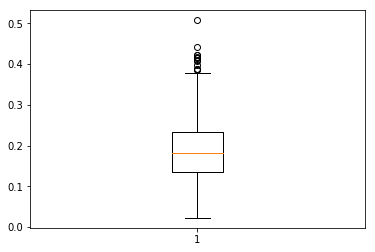

In [54]:
#windspeed
plt.boxplot(bike_data["windspeed"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1942cd553c8>,
 'caps': [<matplotlib.lines.Line2D at 0x1942cd55a58>,
 'boxes': [<matplotlib.lines.Line2D at 0x1942ca84f98>],
 'medians': [<matplotlib.lines.Line2D at 0x1942cd55e80>],
 'fliers': [<matplotlib.lines.Line2D at 0x1942cd5a470>],
 'means': []}

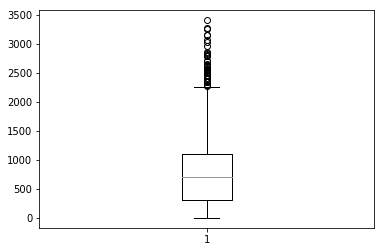

In [55]:
#casual users
plt.boxplot(bike_data["casual user"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1942cae3518>,
 'caps': [<matplotlib.lines.Line2D at 0x1942cae3ba8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1942cae3128>],
 'medians': [<matplotlib.lines.Line2D at 0x1942cae3fd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1942caef5c0>],
 'means': []}

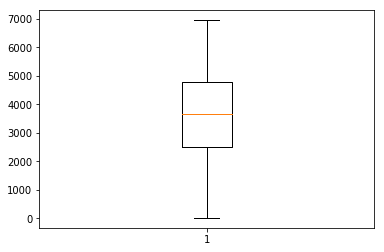

In [56]:
#rigisterd user
plt.boxplot(bike_data["registered user"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1942ccb3668>,
 'caps': [<matplotlib.lines.Line2D at 0x1942ccb3cf8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1942ccb3278>],
 'medians': [<matplotlib.lines.Line2D at 0x1942cbf33c8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1942cbf3710>],
 'means': []}

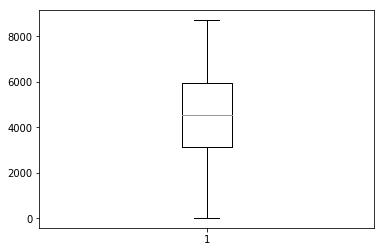

In [57]:
#count of bike users
#target variable
plt.boxplot(bike_data["count of bike users"])

In [58]:
# #Detect and delete outliers from data
onames=['windspeed','casual user','humidity']
for i in onames:
    print(i)
    q75, q25 = np.percentile(bike_data.loc[:,i], [75 ,25])
    iqr = q75 - q25
    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
    print(min)
    print(max) 
    bike_data = bike_data.drop(bike_data[bike_data.loc[:,i] < min].index)
    bike_data = bike_data.drop(bike_data[bike_data.loc[:,i] > max].index)    
       

windspeed
-0.012446750000000034
0.38061125
casual user
-886.125
2322.875
humidity
0.20958300000000007
1.049583


{'whiskers': [<matplotlib.lines.Line2D at 0x1942ca0df60>,
 'caps': [<matplotlib.lines.Line2D at 0x1942c9ec630>,
 'boxes': [<matplotlib.lines.Line2D at 0x1942ca0db70>],
 'medians': [<matplotlib.lines.Line2D at 0x1942c9eccc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1942c9ecda0>],
 'means': []}

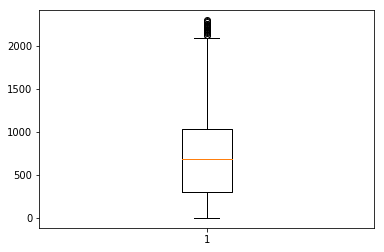

In [59]:
plt.boxplot(bike_data["casual user"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1942ca56da0>,
 'caps': [<matplotlib.lines.Line2D at 0x1942ca4a710>,
 'boxes': [<matplotlib.lines.Line2D at 0x1942ca56c50>],
 'medians': [<matplotlib.lines.Line2D at 0x1942ca4ada0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1942ca4ae80>],
 'means': []}

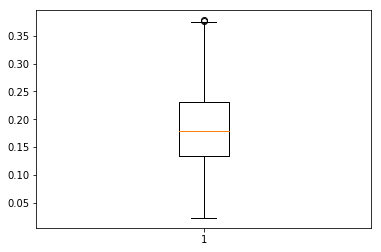

In [60]:
plt.boxplot(bike_data["windspeed"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1942cc18b00>,
 'caps': [<matplotlib.lines.Line2D at 0x1942cc18f28>,
 'boxes': [<matplotlib.lines.Line2D at 0x1942cc18710>],
 'medians': [<matplotlib.lines.Line2D at 0x1942cc30860>],
 'fliers': [<matplotlib.lines.Line2D at 0x1942cc30ba8>],
 'means': []}

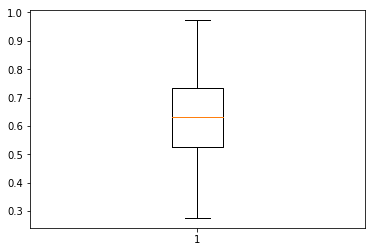

In [61]:
plt.boxplot(bike_data["humidity"])

# feature enginnering

In [62]:
bike_data.dtypes

date-day                object
season                   int64
year                     int64
month                    int64
holiday                  int64
weekday                  int64
working day              int64
weather situation        int64
temperature            float64
temperature felt       float64
humidity               float64
windspeed              float64
casual user              int64
registered user          int64
count of bike users      int64
dtype: object

In [63]:
#Converting redpective variables to required data format 
bike_data['date-day'] = pd.to_datetime(bike_data['date-day'],yearfirst=True)
bike_data['season'] = bike_data['season'].astype('category')
bike_data['year'] = bike_data['year'].astype('category')
bike_data['month'] = bike_data['month'].astype('category')
bike_data['holiday'] = bike_data['holiday'].astype('category')
bike_data['weekday'] = bike_data['weekday'].astype('category')
bike_data['working day'] = bike_data['working day'].astype('category')
bike_data['weather situation'] = bike_data['weather situation'].astype('category')

bike_data['temperature'] = bike_data['temperature'].astype('float')
bike_data['temperature felt'] = bike_data['temperature felt'].astype('float')
bike_data['humidity'] = bike_data['humidity'].astype('float')
bike_data['windspeed'] = bike_data['windspeed'].astype('float')
bike_data['casual user'] = bike_data['casual user'].astype('float')
bike_data['registered user'] = bike_data['registered user'].astype('float')
bike_data['count of bike users'] = bike_data['count of bike users'].astype('float')

In [64]:
bike_data.dtypes

date-day               datetime64[ns]
season                       category
year                         category
month                        category
holiday                      category
weekday                      category
working day                  category
weather situation            category
temperature                   float64
temperature felt              float64
humidity                      float64
windspeed                     float64
casual user                   float64
registered user               float64
count of bike users           float64
dtype: object

# feature selection

,temperature,temperature felt,humidity,windspeed,casual user,registered user,count of bike users
temperature,1,0.991497,0.122406,0.138183,0.585568,0.542106,0.625918
temperature felt,0.991497,1,0.135352,0.165645,0.584664,0.544994,0.628104
humidity,0.122406,0.135352,1,0.205273,0.0888873,0.112971,0.120973
windspeed,0.138183,0.165645,0.205273,1,0.177481,0.213087,0.230985
casual user,0.585568,0.584664,0.0888873,0.177481,1,0.418987,0.64008
registered user,0.542106,0.544994,0.112971,0.213087,0.418987,1,0.965803
count of bike users,0.625918,0.628104,0.120973,0.230985,0.64008,0.965803,1


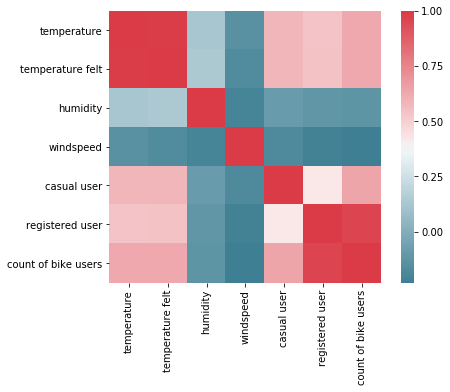

In [65]:
#analysing numerical variables first
#correlation analysis for numeric variables
#extracting numerical variables
num_names = ["temperature","temperature felt","humidity","windspeed","casual user","registered user","count of bike users"]
cat_names = ["season","year","month","holiday","weekday","working day","weather situation"]
bike_data_num=bike_data.loc[:,num_names]
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(7, 5))

#Generate correlation matrix
corr = bike_data_num.corr()

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
# Create correlation matrix
corr_matrix = bike_data_num.corr().abs()
corr_matrix.style.background_gradient(cmap='GnBu_r')

In [66]:
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
to_drop

['temperature felt', 'count of bike users']

In [67]:
#from correlation analysis we come to conclusion that temperature and temerature felt have high correlation
#so we need to drop temperature felt 
bike_data=bike_data.drop(["temperature felt"],axis=1)
bike_data.head()

,date-day,season,year,month,holiday,weekday,working day,weather situation,temperature,humidity,windspeed,casual user,registered user,count of bike users
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,331.0,654.0,985.0
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,131.0,670.0,801.0
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,120.0,1229.0,1349.0
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,108.0,1454.0,1562.0
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,82.0,1518.0,1600.0


In [68]:
#for catagorical variables we will perform Chisquare test of independence
for i in cat_names:
    print(i)
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(bike_data['count of bike users'], bike_data[i]))
    print(p)

season
0.5306886312713439
year
0.41642366315035007
month
0.4756091821561145
holiday
0.7870836122582522
weekday
0.43936502670720573
working day
0.504633411642988
weather situation
0.5464467453059881


In [69]:
#
#
bike_data=bike_data.drop(["holiday"],axis=1)
bike_data.head()

,date-day,season,year,month,weekday,working day,weather situation,temperature,humidity,windspeed,casual user,registered user,count of bike users
0,2011-01-01,1,0,1,6,0,2,0.344167,0.805833,0.160446,331.0,654.0,985.0
1,2011-01-02,1,0,1,0,0,2,0.363478,0.696087,0.248539,131.0,670.0,801.0
2,2011-01-03,1,0,1,1,1,1,0.196364,0.437273,0.248309,120.0,1229.0,1349.0
3,2011-01-04,1,0,1,2,1,1,0.200000,0.590435,0.160296,108.0,1454.0,1562.0
4,2011-01-05,1,0,1,3,1,1,0.226957,0.436957,0.186900,82.0,1518.0,1600.0


# feature scalling

In [70]:
#here the  six  numerics variables are present  out of six four variables are in normalize form
#thus scaling casual user and registerd users
fnames = ['casual user','registered user']

for i in fnames :
    print(i)
    bike_data[i] = (bike_data[i] - np.min(bike_data[i]))/(np.max(bike_data[i]) - np.min(bike_data[i]))

bike_data.head()

casual user
registered user


,date-day,season,year,month,weekday,working day,weather situation,temperature,humidity,windspeed,casual user,registered user,count of bike users
0,2011-01-01,1,0,1,6,0,2,0.344167,0.805833,0.160446,0.143106,0.091539,985.0
1,2011-01-02,1,0,1,0,0,2,0.363478,0.696087,0.248539,0.056111,0.093849,801.0
2,2011-01-03,1,0,1,1,1,1,0.196364,0.437273,0.248309,0.051327,0.174560,1349.0
3,2011-01-04,1,0,1,2,1,1,0.200000,0.590435,0.160296,0.046107,0.207046,1562.0
4,2011-01-05,1,0,1,3,1,1,0.226957,0.436957,0.186900,0.034798,0.216286,1600.0


# modeling

In [71]:
#applying discetion tree modle for regression first
#Load libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics


In [72]:
#spliting data into test and train for modling
train, test = train_test_split(bike_data, test_size=0.2)
x_train = train.iloc[:,1:12]
y_train = train.iloc[:,12]

x_test = test.iloc[:,1:12]
y_test = test.iloc[:,12]


In [73]:
#Decision tree for regression
# Train the model using the training sets
fit_DT = DecisionTreeRegressor(max_depth=2).fit(x_train, y_train)
# make the predictions by the model
predictions_DT = fit_DT.predict(x_test).round(0)
# data frame for actual and predicted values
df_dt = pd.DataFrame({'actual': y_test, 'pred': predictions_DT})
print(df_dt.head())
#Calculate MAPE
def MAPE(y_true, y_pred): 
    mape = np.mean(np.abs(( y_true - y_pred) / y_true))*100
    return mape
mape=MAPE(y_test, predictions_DT)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
# errors and accuracy 
print("MEAN ABSOLUTE ERROR:"+str(mape)+"%")
print('Accuracy:', round(accuracy, 2), '%.')

     actual    pred
109  3944.0  4736.0
392  4023.0  4736.0
157  4833.0  4736.0
21    981.0  1660.0
217  4294.0  3219.0
MEAN ABSOLUTE ERROR:17.77118197953835%
Accuracy: 82.23 %.


In [74]:
#Random forest for regression
#Import libraries for RF
from sklearn.ensemble import RandomForestRegressor
# Train the model using the training sets
RFmodel = RandomForestRegressor(n_estimators = 200).fit(x_train, y_train)
# make the predictions by the model
RF_Predictions = RFmodel.predict(x_test).round(0)
# data frame for actual and predicted values
df_RF = pd.DataFrame({'actual': y_test, 'pred': RF_Predictions})
print(df_RF.head())
# Calculate and display accuracy
mape=MAPE(y_test,RF_Predictions)
accuracy = 100 - np.mean(mape) 
print("MEAN ABSOLUTE ERROR:"+str(mape)+"%")
print('Accuracy:', round(accuracy, 2), '%.')


     actual    pred
109  3944.0  3963.0
392  4023.0  4066.0
157  4833.0  4859.0
21    981.0  1007.0
217  4294.0  4238.0
MEAN ABSOLUTE ERROR:1.88018275302105%
Accuracy: 98.12 %.


In [75]:
# Linear Regression
#Import libraries for LR
import statsmodels.api as sm
# Train the model using the training sets
model = sm.OLS(y_train,x_train.astype(float)).fit()
#Summary of model
model.summary()
# make the predictions by the model
predictions_LR = model.predict(x_test.astype(float)).round(0)
# data frame for actual and predicted values
df_LR = pd.DataFrame({'actual': y_test, 'pred': predictions_LR})
print(df_LR.head())
# Calculate and display accuracy
mape=MAPE(y_test,predictions_LR)
accuracy = 100 - np.mean(mape) 
print("MEAN ABSOLUTE ERROR:"+str(mape)+"%")
print('Accuracy:', round(accuracy, 2), '%.')


     actual    pred
109  3944.0  3945.0
392  4023.0  4021.0
157  4833.0  4832.0
21    981.0   973.0
217  4294.0  4297.0
MEAN ABSOLUTE ERROR:0.09036549858089063%
Accuracy: 99.91 %.


# thus lr modle would be best fit

In [78]:
#output
df_LR.to_csv("py output.csv", index= False)